In [1]:
from solartwins import *

In [27]:
import plotly 
import plotly.figure_factory as ff
from plotly.graph_objs import graph_objs
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy import stats
from pandas import DataFrame
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import astropy.stats as astat

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [4]:
table= t.copy()

table.remove_column('O')
table.remove_column('C')

elements =[]
elnames = table.columns[3:64]
for n in elnames:
    if len(n) < 3 :
        elements.append(n)

atomic_number = [26, 11, 12, 13, 14, 16, 20, 23, 25, 27, 28, 29, 30, 38, 
                39, 40, 56, 57, 58, 59, 60, 62, 63, 64, 66, 22, 21, 24]

element_names = ['Iron', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Sulfur', 'Calcium', 'Vanadium', 'Manganese', 
    'Cobalt', 'Nickel', 'Copper', 'Zinc', 'Strontium', 'Yttrium', 'Zirconium', 'Barium', 'Lanthanum ', 'Cesium', 
    'Praseodymium', 'Neodymium', 'Samarium', 'Europium', 'Gadolinium', 'Dysprosium', 'Titanium', 'Scandium']

In [5]:
beforetc = [] #standard deviations of the abundance data before condensation trends were removed
after = [] #standard deviations of residual abundances (after correct con temp trends removed)
for index, element in enumerate(elements): 
    abundance_beforetc = np.array(table[element]) 
    beforetc.append(stdev(abundance_beforetc)) 
    
    element_temp = [] #array for creation  of after
    for ob in t['star_name']: #for each star in our data
        abund = np.array(star_table(ob)['Abundance']) 
        con_temp = np.array(star_table(ob)['Condensation Temp'])
        error = np.array(star_table(ob)['Abundance Error'])
        residu = residuals(con_temp, abund, error) #residuals with consendation temperatures removed
        element_temp.append(residu[index]) 
    after.append(np.std(element_temp)) 

In [6]:
beforetc =np.array(beforetc)
after =np.array(after)

difference = beforetc - after #change after regular con temp trends removed
increase =[]
for num in difference:
    if num > 0:
        increase.append('decreased')
    elif num < 0:
        increase.append('increased')

In [7]:
con_temp_shuffle = []
for n in elements:
    con_temp_shuffle.append(tc_map[n]) 
   
stdevs = np.zeros((1000,28))
for i in tqdm(range(1000)):
    np.random.shuffle(con_temp_shuffle)
    all_residu = np.zeros((len(t['star_name']),28))
    
    for j,ob in enumerate(t['star_name']):
        abund = np.array(star_table(ob)['Abundance'])
        con_temp_shuff = np.array(con_temp_shuffle)
        error = np.array(star_table(ob)['Abundance Error'])
        all_residu[j,:] = residuals(con_temp_shuff, abund, error)

    for index, element in tqdm(enumerate(elements)):
        stdevs[i,index] = np.std(all_residu[:,index])

  0%|          | 0/1000 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|          | 1/1000 [00:01<23:22,  1.40s/it]
0it [00:00, ?it/s]
  0%|          | 2/1000 [00:02<22:12,  1.34s/it]
0it [00:00, ?it/s]
  0%|          | 3/1000 [00:03<22:31,  1.36s/it]
0it [00:00, ?it/s]
  0%|          | 4/1000 [00:05<22:03,  1.33s/it]
0it [00:00, ?it/s]
  0%|          | 5/1000 [00:06<21:25,  1.29s/it]
0it [00:00, ?it/s]
  1%|          | 6/1000 [00:07<20:42,  1.25s/it]
0it [00:00, ?it/s]
  1%|          | 7/1000 [00:08<20:11,  1.22s/it]
0it [00:00, ?it/s]
  1%|          | 8/1000 [00:09<19:57,  1.21s/it]
0it [00:00, ?it/s]
  1%|          | 9/1000 [00:11<19:42,  1.19s/it]
0it [00:00, ?it/s]
  1%|          | 10/1000 [00:12<19:30,  1.18s/it]
0it [00:00, ?it/s]
  1%|          | 11/1000 [00:13<19:25,  1.18s/it]
0it [00:00, ?it/s]
  1%|          | 12/1000 [00:14<19:24,  1.18s/it]
0it [00:00, ?it/s]
  1%|▏         | 13/1000 [00:15<19:24,  1.18s/it]
0it [00:00, ?it/s]
  1%|▏         | 14/1000 [00:16<19:07,  1.16s/it]
0i

0it [00:00, ?it/s]
 11%|█▏        | 114/1000 [02:13<19:19,  1.31s/it]
0it [00:00, ?it/s]
 12%|█▏        | 115/1000 [02:14<18:47,  1.27s/it]
0it [00:00, ?it/s]
 12%|█▏        | 116/1000 [02:15<19:11,  1.30s/it]
0it [00:00, ?it/s]
 12%|█▏        | 117/1000 [02:17<19:30,  1.33s/it]
0it [00:00, ?it/s]
 12%|█▏        | 118/1000 [02:18<19:27,  1.32s/it]
0it [00:00, ?it/s]
 12%|█▏        | 119/1000 [02:20<20:13,  1.38s/it]
0it [00:00, ?it/s]
 12%|█▏        | 120/1000 [02:21<20:02,  1.37s/it]
0it [00:00, ?it/s]
 12%|█▏        | 121/1000 [02:22<19:04,  1.30s/it]
0it [00:00, ?it/s]
 12%|█▏        | 122/1000 [02:23<19:34,  1.34s/it]
0it [00:00, ?it/s]
 12%|█▏        | 123/1000 [02:25<20:40,  1.41s/it]
0it [00:00, ?it/s]
 12%|█▏        | 124/1000 [02:27<21:19,  1.46s/it]
0it [00:00, ?it/s]
 12%|█▎        | 125/1000 [02:28<21:40,  1.49s/it]
0it [00:00, ?it/s]
 13%|█▎        | 126/1000 [02:29<20:13,  1.39s/it]
0it [00:00, ?it/s]
 13%|█▎        | 127/1000 [02:31<19:49,  1.36s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 23%|██▎       | 226/1000 [04:30<15:01,  1.17s/it]
0it [00:00, ?it/s]
 23%|██▎       | 227/1000 [04:31<15:00,  1.16s/it]
0it [00:00, ?it/s]
 23%|██▎       | 228/1000 [04:32<15:03,  1.17s/it]
0it [00:00, ?it/s]
 23%|██▎       | 229/1000 [04:33<14:54,  1.16s/it]
0it [00:00, ?it/s]
 23%|██▎       | 230/1000 [04:34<14:56,  1.16s/it]
0it [00:00, ?it/s]
 23%|██▎       | 231/1000 [04:36<15:03,  1.17s/it]
0it [00:00, ?it/s]
 23%|██▎       | 232/1000 [04:37<14:59,  1.17s/it]
0it [00:00, ?it/s]
 23%|██▎       | 233/1000 [04:38<14:59,  1.17s/it]
0it [00:00, ?it/s]
 23%|██▎       | 234/1000 [04:39<14:47,  1.16s/it]
0it [00:00, ?it/s]
 24%|██▎       | 235/1000 [04:40<14:50,  1.16s/it]
0it [00:00, ?it/s]
 24%|██▎       | 236/1000 [04:41<14:44,  1.16s/it]
0it [00:00, ?it/s]
 24%|██▎       | 237/1000 [04:43<14:43,  1.16s/it]
0it [00:00, ?it/s]
 24%|██▍       | 238/1000 [04:44<14:39,  1.15s/it]
0it [00:00, ?it/s]
 24%|██▍       | 239/1000 [04:45<14:40,  1.16s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 34%|███▍      | 338/1000 [06:39<14:09,  1.28s/it]
0it [00:00, ?it/s]
 34%|███▍      | 339/1000 [06:40<13:38,  1.24s/it]
0it [00:00, ?it/s]
 34%|███▍      | 340/1000 [06:41<13:12,  1.20s/it]
0it [00:00, ?it/s]
 34%|███▍      | 341/1000 [06:42<12:57,  1.18s/it]
0it [00:00, ?it/s]
 34%|███▍      | 342/1000 [06:43<12:48,  1.17s/it]
0it [00:00, ?it/s]
 34%|███▍      | 343/1000 [06:45<12:45,  1.17s/it]
0it [00:00, ?it/s]
 34%|███▍      | 344/1000 [06:46<12:43,  1.16s/it]
0it [00:00, ?it/s]
 34%|███▍      | 345/1000 [06:47<12:35,  1.15s/it]
0it [00:00, ?it/s]
 35%|███▍      | 346/1000 [06:48<12:29,  1.15s/it]
0it [00:00, ?it/s]
 35%|███▍      | 347/1000 [06:49<12:23,  1.14s/it]
0it [00:00, ?it/s]
 35%|███▍      | 348/1000 [06:50<12:23,  1.14s/it]
0it [00:00, ?it/s]
 35%|███▍      | 349/1000 [06:51<12:30,  1.15s/it]
0it [00:00, ?it/s]
 35%|███▌      | 350/1000 [06:53<12:31,  1.16s/it]
0it [00:00, ?it/s]
 35%|███▌      | 351/1000 [06:54<12:21,  1.14s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 45%|████▌     | 450/1000 [08:46<10:25,  1.14s/it]
0it [00:00, ?it/s]
 45%|████▌     | 451/1000 [08:47<10:17,  1.12s/it]
0it [00:00, ?it/s]
 45%|████▌     | 452/1000 [08:48<10:17,  1.13s/it]
0it [00:00, ?it/s]
 45%|████▌     | 453/1000 [08:49<10:17,  1.13s/it]
0it [00:00, ?it/s]
 45%|████▌     | 454/1000 [08:51<10:23,  1.14s/it]
0it [00:00, ?it/s]
 46%|████▌     | 455/1000 [08:52<10:23,  1.14s/it]
0it [00:00, ?it/s]
 46%|████▌     | 456/1000 [08:54<13:00,  1.44s/it]
0it [00:00, ?it/s]
 46%|████▌     | 457/1000 [08:56<13:43,  1.52s/it]
0it [00:00, ?it/s]
 46%|████▌     | 458/1000 [08:57<14:24,  1.59s/it]
0it [00:00, ?it/s]
 46%|████▌     | 459/1000 [08:59<14:22,  1.59s/it]
0it [00:00, ?it/s]
 46%|████▌     | 460/1000 [09:01<14:50,  1.65s/it]
0it [00:00, ?it/s]
 46%|████▌     | 461/1000 [09:02<14:26,  1.61s/it]
0it [00:00, ?it/s]
 46%|████▌     | 462/1000 [09:04<13:53,  1.55s/it]
0it [00:00, ?it/s]
 46%|████▋     | 463/1000 [09:05<13:27,  1.50s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 56%|█████▌    | 562/1000 [11:12<09:10,  1.26s/it]
0it [00:00, ?it/s]
 56%|█████▋    | 563/1000 [11:14<09:19,  1.28s/it]
0it [00:00, ?it/s]
 56%|█████▋    | 564/1000 [11:15<10:05,  1.39s/it]
0it [00:00, ?it/s]
 56%|█████▋    | 565/1000 [11:17<10:50,  1.49s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 566/1000 [11:19<10:31,  1.46s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 567/1000 [11:20<09:54,  1.37s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 568/1000 [11:21<09:35,  1.33s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 569/1000 [11:22<09:34,  1.33s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 570/1000 [11:24<09:26,  1.32s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 571/1000 [11:25<09:50,  1.38s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 572/1000 [11:27<11:31,  1.62s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 573/1000 [11:30<12:56,  1.82s/it]
0it [00:00, ?it/s]
 57%|█████▋    | 574/1000 [11:32<13:32,  1.91s/it]
0it [00:00, ?it/s]
 57%|█████▊    | 575/1000 [11:33<13:14,  1.87s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 67%|██████▋   | 674/1000 [13:33<06:13,  1.15s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 675/1000 [13:35<06:34,  1.21s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 676/1000 [13:36<07:04,  1.31s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 677/1000 [13:38<07:28,  1.39s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 678/1000 [13:39<07:20,  1.37s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 679/1000 [13:40<07:09,  1.34s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 680/1000 [13:42<06:48,  1.28s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 681/1000 [13:43<06:30,  1.22s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 682/1000 [13:44<06:20,  1.20s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 683/1000 [13:45<06:13,  1.18s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 684/1000 [13:46<06:09,  1.17s/it]
0it [00:00, ?it/s]
 68%|██████▊   | 685/1000 [13:47<06:05,  1.16s/it]
0it [00:00, ?it/s]
 69%|██████▊   | 686/1000 [13:48<06:02,  1.16s/it]
0it [00:00, ?it/s]
 69%|██████▊   | 687/1000 [13:49<05:58,  1.15s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 79%|███████▊  | 786/1000 [16:05<04:20,  1.22s/it]
0it [00:00, ?it/s]
 79%|███████▊  | 787/1000 [16:07<04:34,  1.29s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 788/1000 [16:08<04:30,  1.28s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 789/1000 [16:09<04:33,  1.30s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 790/1000 [16:11<04:35,  1.31s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 791/1000 [16:12<04:27,  1.28s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 792/1000 [16:13<04:34,  1.32s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 793/1000 [16:15<04:38,  1.35s/it]
0it [00:00, ?it/s]
 79%|███████▉  | 794/1000 [16:16<04:42,  1.37s/it]
0it [00:00, ?it/s]
 80%|███████▉  | 795/1000 [16:18<04:40,  1.37s/it]
0it [00:00, ?it/s]
 80%|███████▉  | 796/1000 [16:19<04:36,  1.36s/it]
0it [00:00, ?it/s]
 80%|███████▉  | 797/1000 [16:20<04:26,  1.31s/it]
0it [00:00, ?it/s]
 80%|███████▉  | 798/1000 [16:22<04:30,  1.34s/it]
0it [00:00, ?it/s]
 80%|███████▉  | 799/1000 [16:23<04:26,  1.33s/it]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 90%|████████▉ | 898/1000 [18:20<02:27,  1.44s/it]
0it [00:00, ?it/s]
 90%|████████▉ | 899/1000 [18:21<02:25,  1.44s/it]
0it [00:00, ?it/s]
 90%|█████████ | 900/1000 [18:23<02:25,  1.45s/it]
0it [00:00, ?it/s]
 90%|█████████ | 901/1000 [18:24<02:17,  1.39s/it]
0it [00:00, ?it/s]
 90%|█████████ | 902/1000 [18:25<02:16,  1.39s/it]
0it [00:00, ?it/s]
 90%|█████████ | 903/1000 [18:27<02:16,  1.41s/it]
0it [00:00, ?it/s]
 90%|█████████ | 904/1000 [18:28<02:14,  1.40s/it]
0it [00:00, ?it/s]
 90%|█████████ | 905/1000 [18:30<02:11,  1.39s/it]
0it [00:00, ?it/s]
 91%|█████████ | 906/1000 [18:31<02:08,  1.36s/it]
0it [00:00, ?it/s]
 91%|█████████ | 907/1000 [18:32<02:03,  1.33s/it]
0it [00:00, ?it/s]
 91%|█████████ | 908/1000 [18:33<02:00,  1.31s/it]
0it [00:00, ?it/s]
 91%|█████████ | 909/1000 [18:35<02:04,  1.37s/it]
0it [00:00, ?it/s]
 91%|█████████ | 910/1000 [18:36<02:01,  1.35s/it]
0it [00:00, ?it/s]
 91%|█████████ | 911/1000 [18:37<01:57,  1.32s/it]
0it [00:00, ?it/s]
 

In [8]:
stdev_differences = {} 
for ind, e in tqdm(enumerate(elements)): 
    stdev_differences['difference' + e] = []
    for index, each in enumerate(stdevs[:,ind]):
        diff = beforetc[ind] - (stdevs[index, ind])
        stdev_differences['difference'+ e].append(diff)
        
names = {}
atomic = {}
stdev_true = {}
for k, v in enumerate(elements):
    names[v] = [v] * 1000
    atomic[v] = [atomic_number[k]] * 1000
    stdev_true[v] = [beforetc[k]] * 1000

28it [00:00, 710.48it/s]


In [9]:
#plotly violin plots
for key, value in enumerate(elements):
    ViData = {'Element' : names[value] , 'Atomic Number': atomic[value], 'StDev': stdev_true[value], 
        'StDev, Tc Removed': stdevs[:,key], 'Difference': stdev_differences['difference'+ value]}

    Vi = DataFrame (ViData, columns = ['Element','Atomic Number', 'StDev', 'StDev, Tc Removed', 'Difference'])

    fig = px.violin(Vi, y="Difference", x="Element", color="Atomic Number", box=True, points="all", 
                    hover_data = None, animation_frame = None, violinmode= 'overlay' )

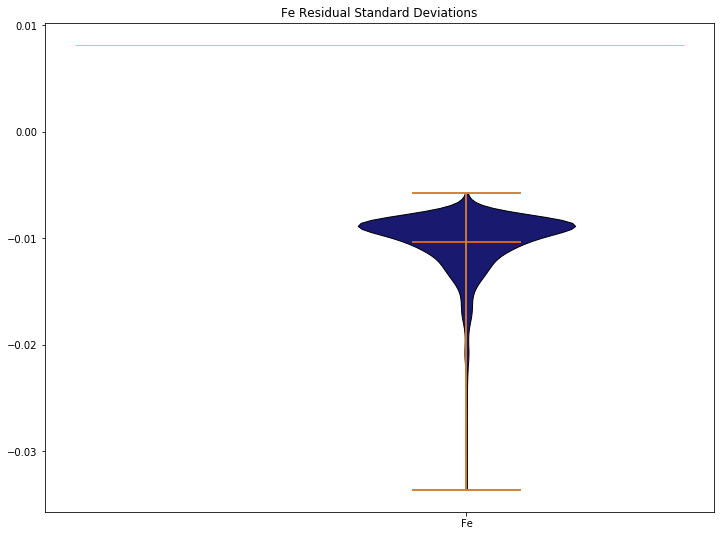

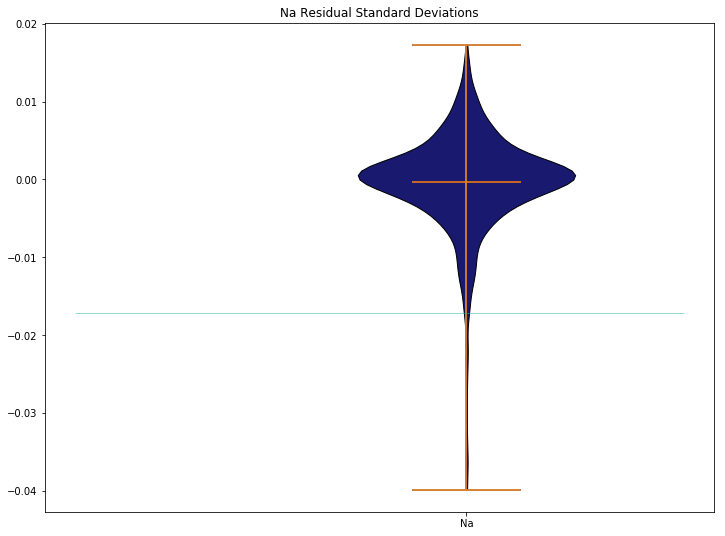

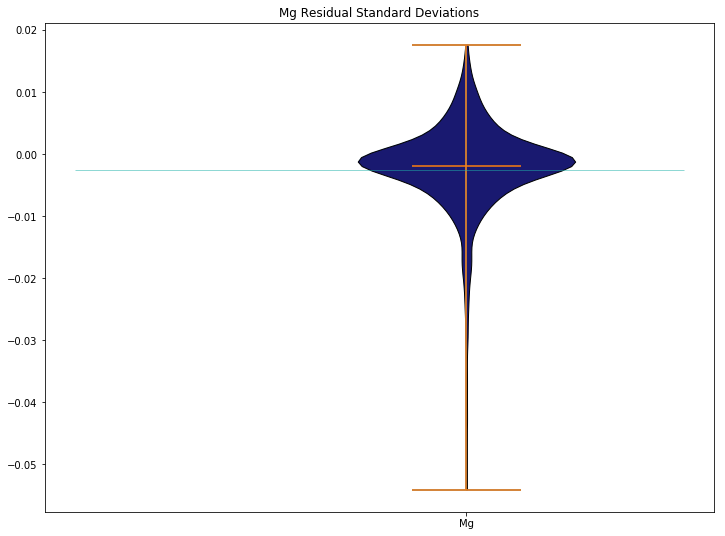

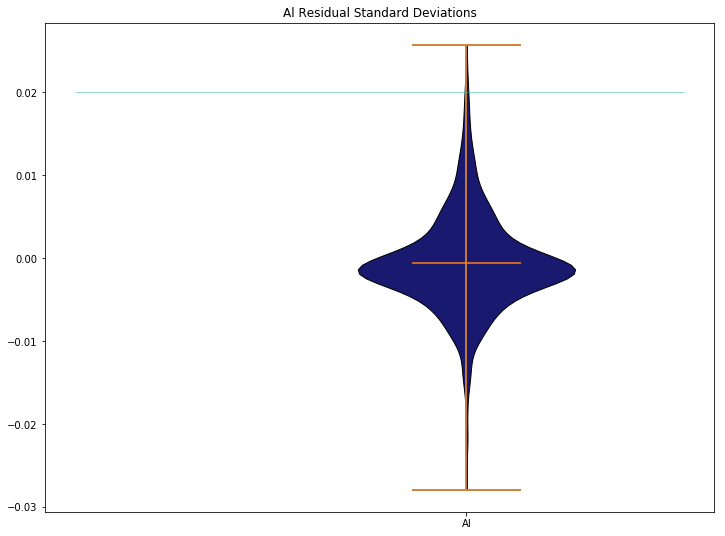

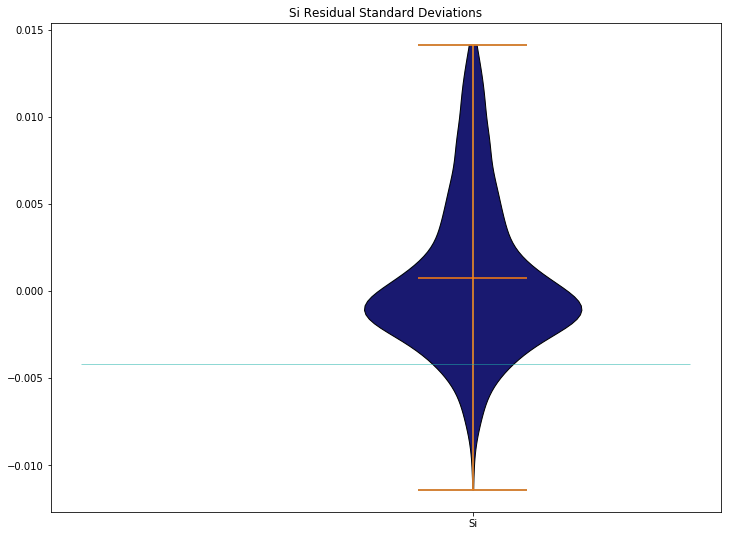

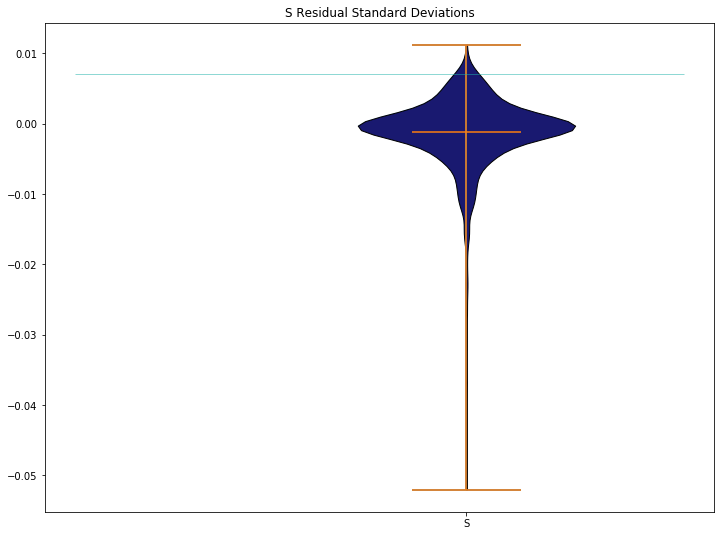

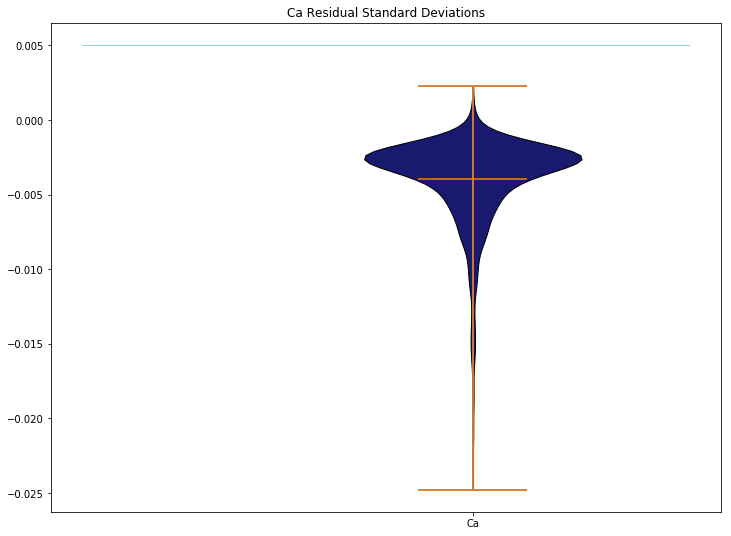

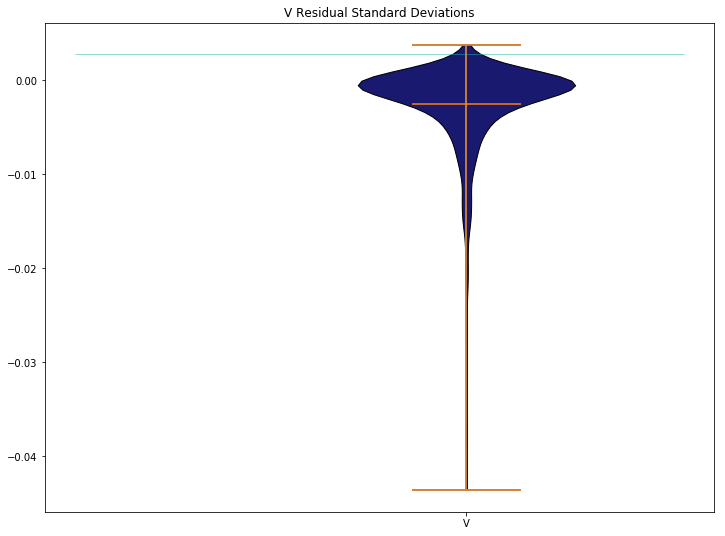

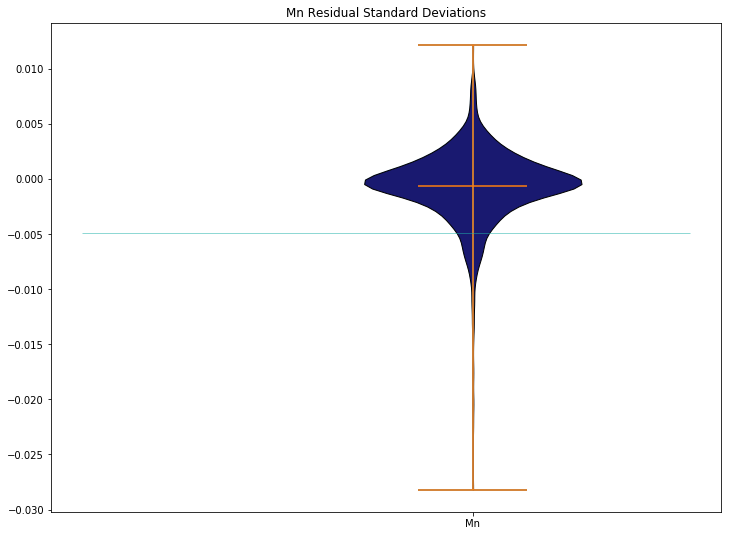

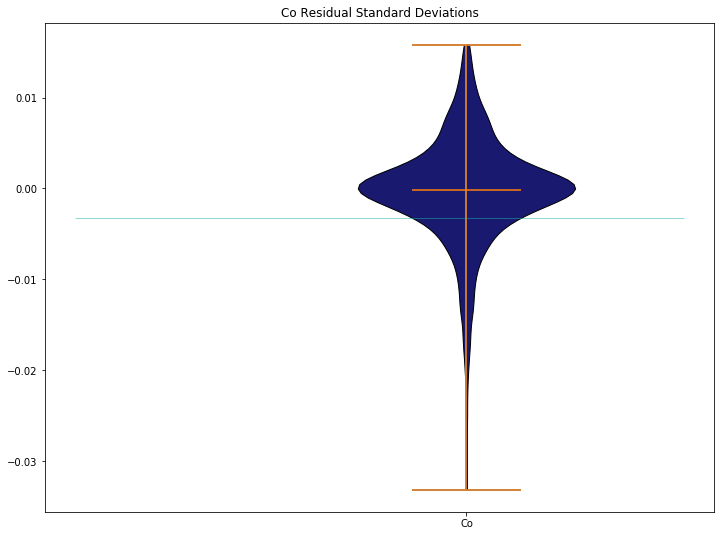

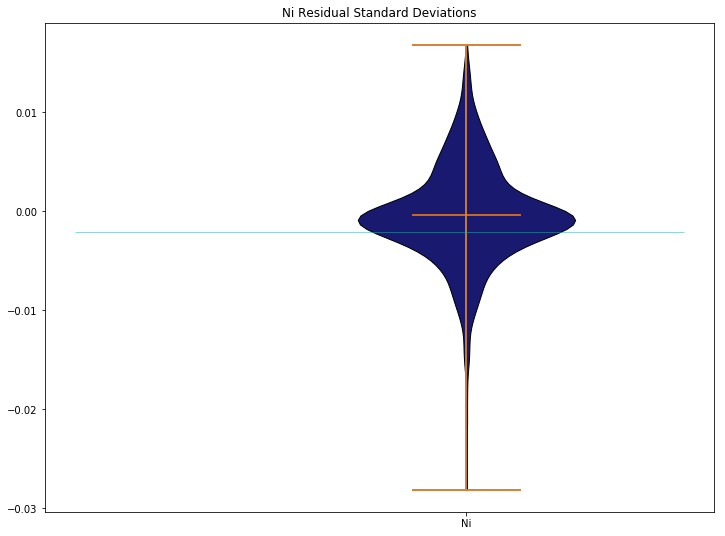

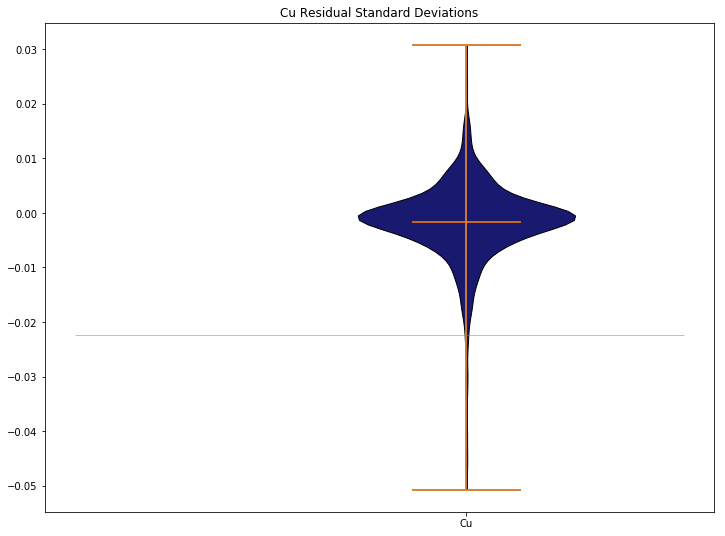

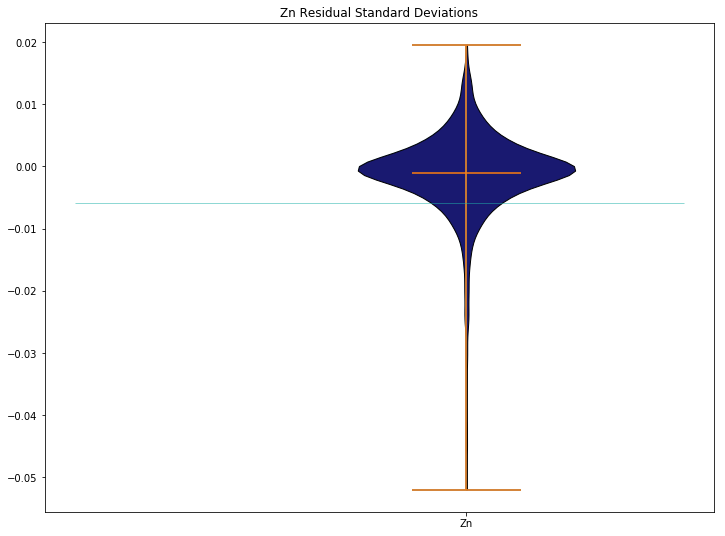

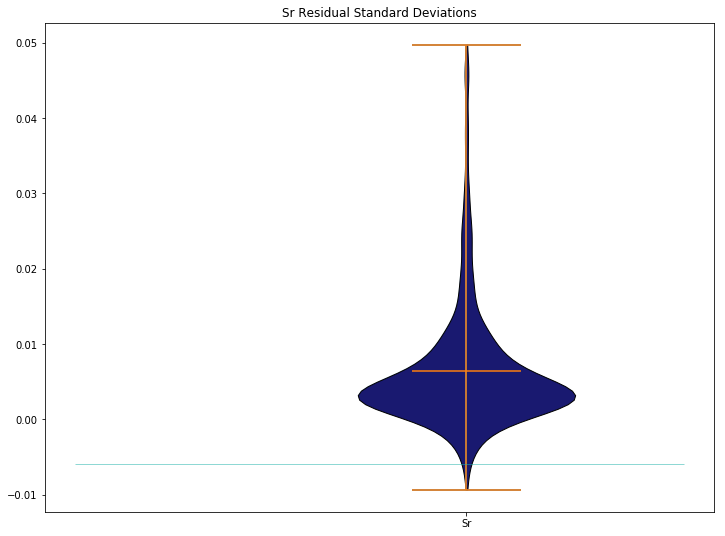

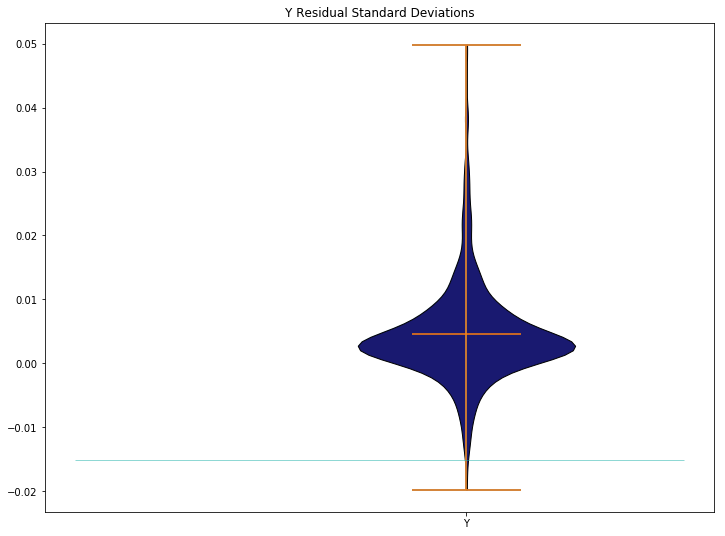

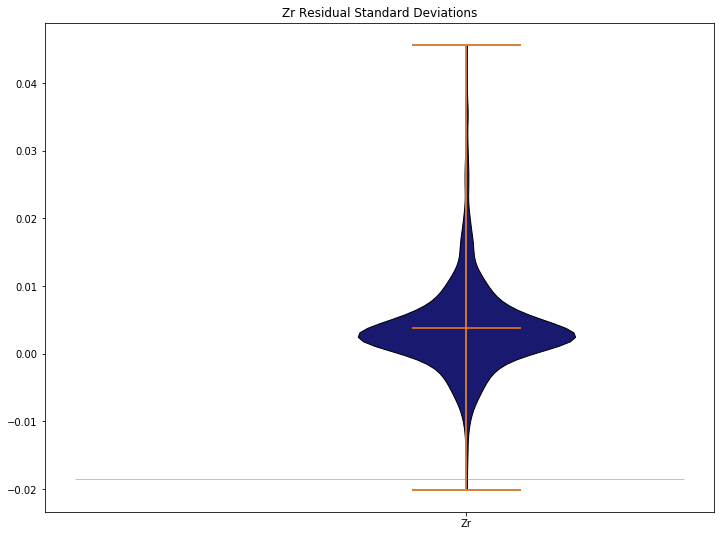

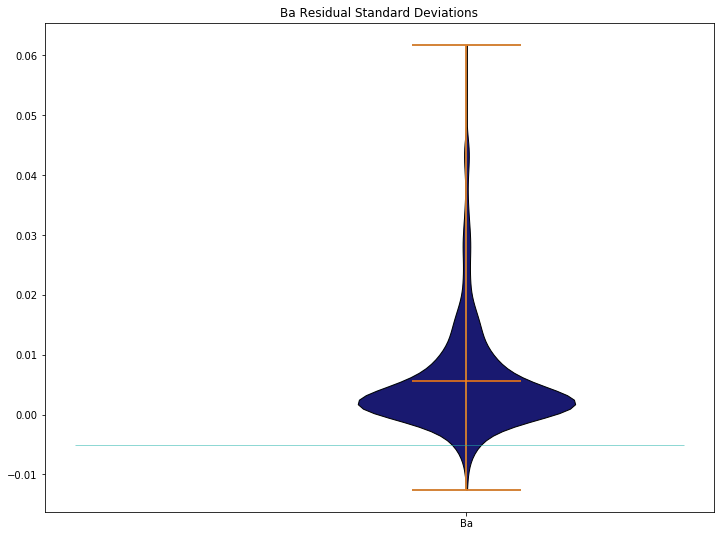

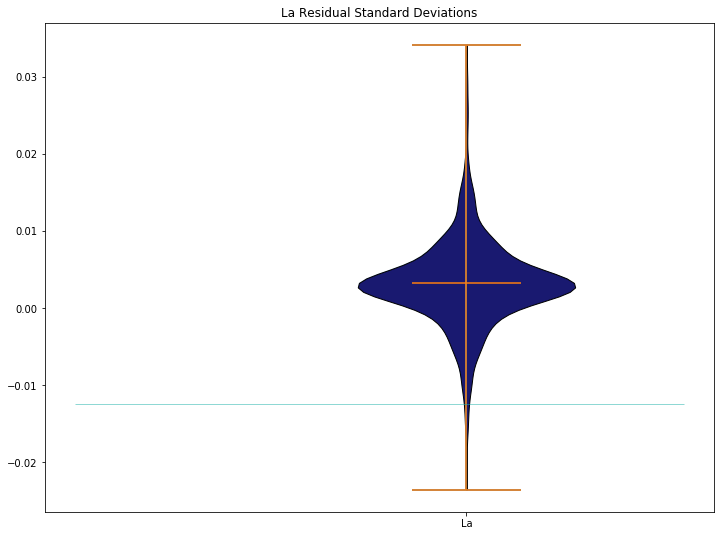

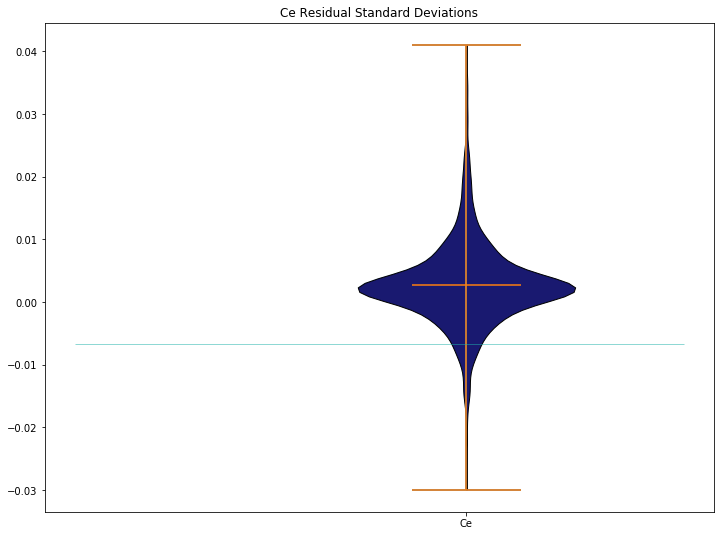

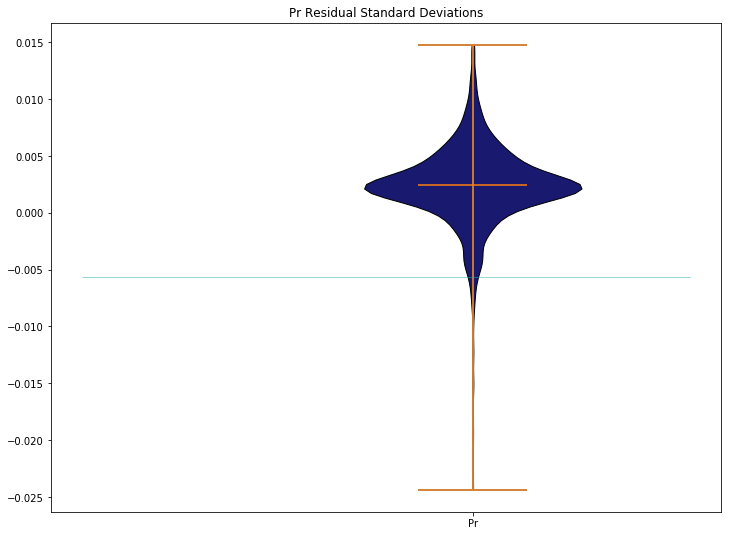

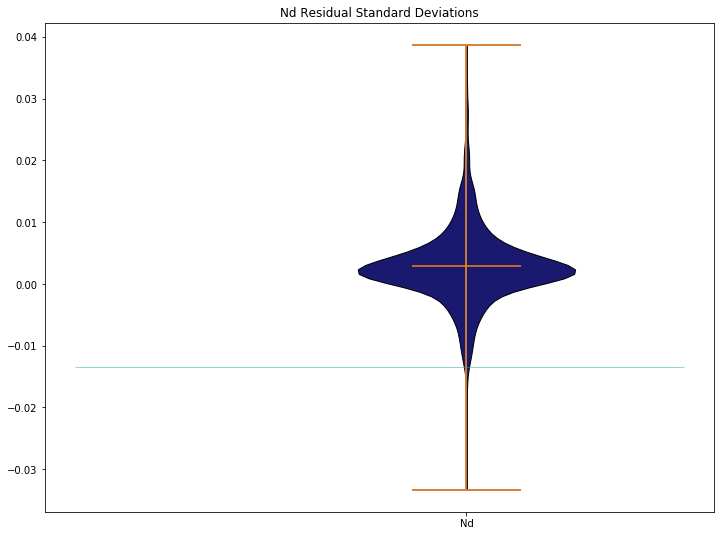

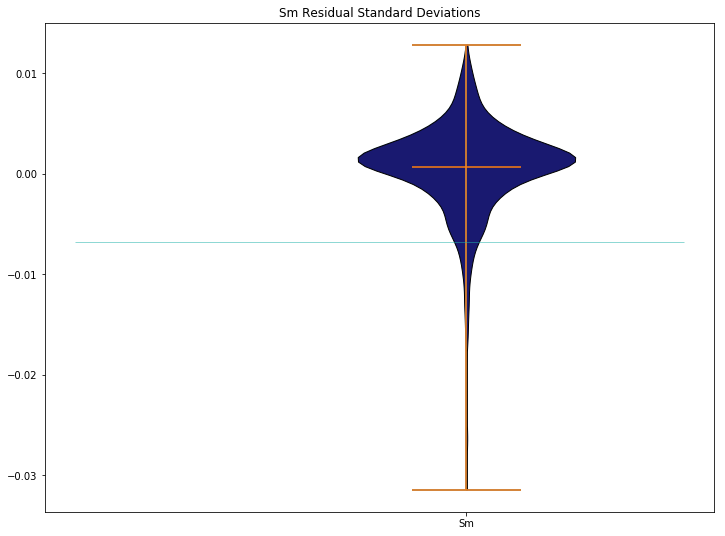

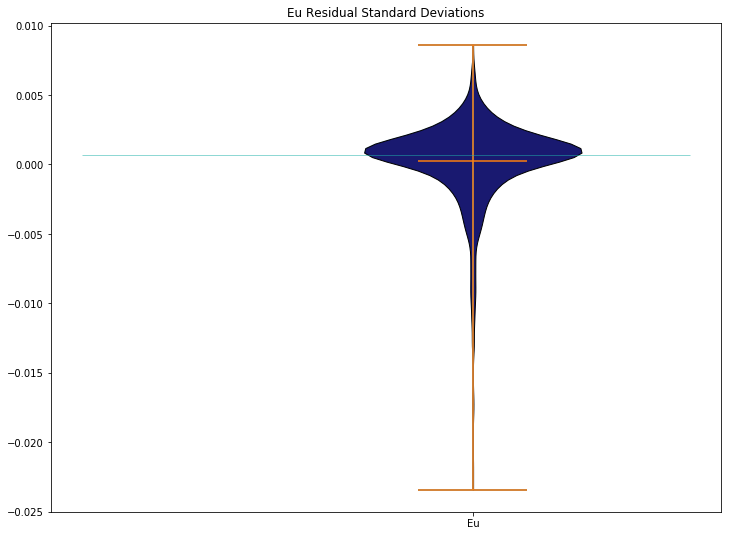

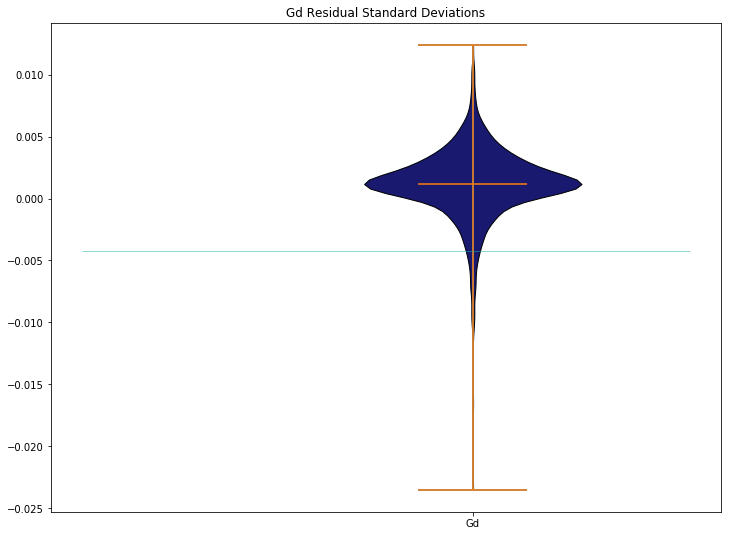

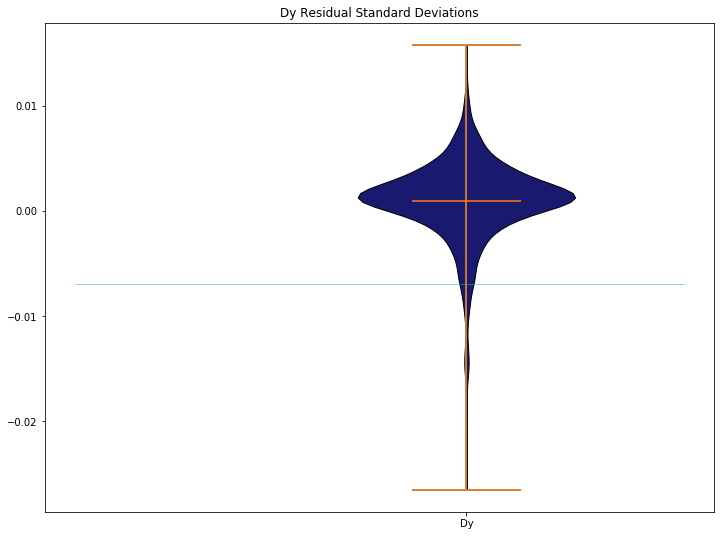

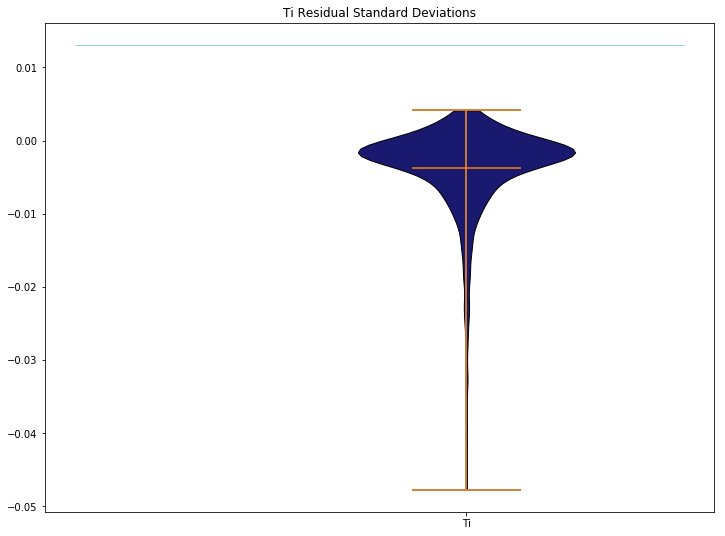

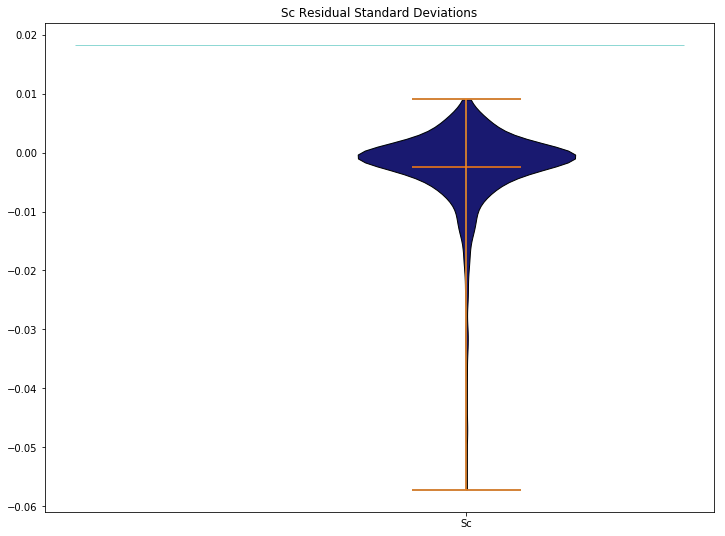

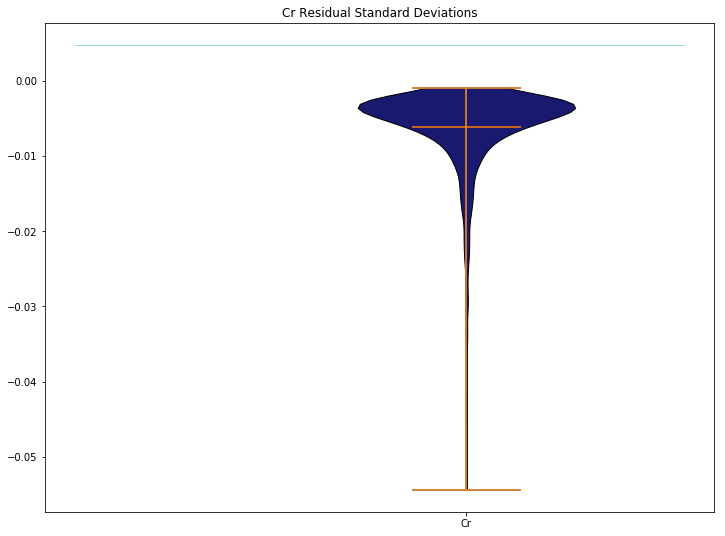

In [10]:
#matplotlib violin plots
for key, value in enumerate(elements):
    ViData = {'Element' : names[value] , 'Atomic Number': atomic[value], 'StDev': stdev_true[value], 
        'StDev, Tc Removed': stdevs[:,key], 'Difference': stdev_differences['difference'+ value]}
    dif = np.asarray(ViData['Difference'])
    vp = plt.violinplot(dif)
    plt.xticks([1],[value])
    plt.title(value + ' Residual Standard Deviations', fontsize=12)
    parts = plt.violinplot(dif,showmeans=True)

    for pc in parts['bodies']:
        pc.set_facecolor('midnightblue')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
   
    plt.hlines((after[key]-beforetc[key]), 0.1, 1.5, color='lightseagreen', linestyle='-', lw=.5)
    
    plt.show()
    plt.savefig(value + 'Vio.png')
    plt.close()

In [11]:
position = np.array(con_temp)

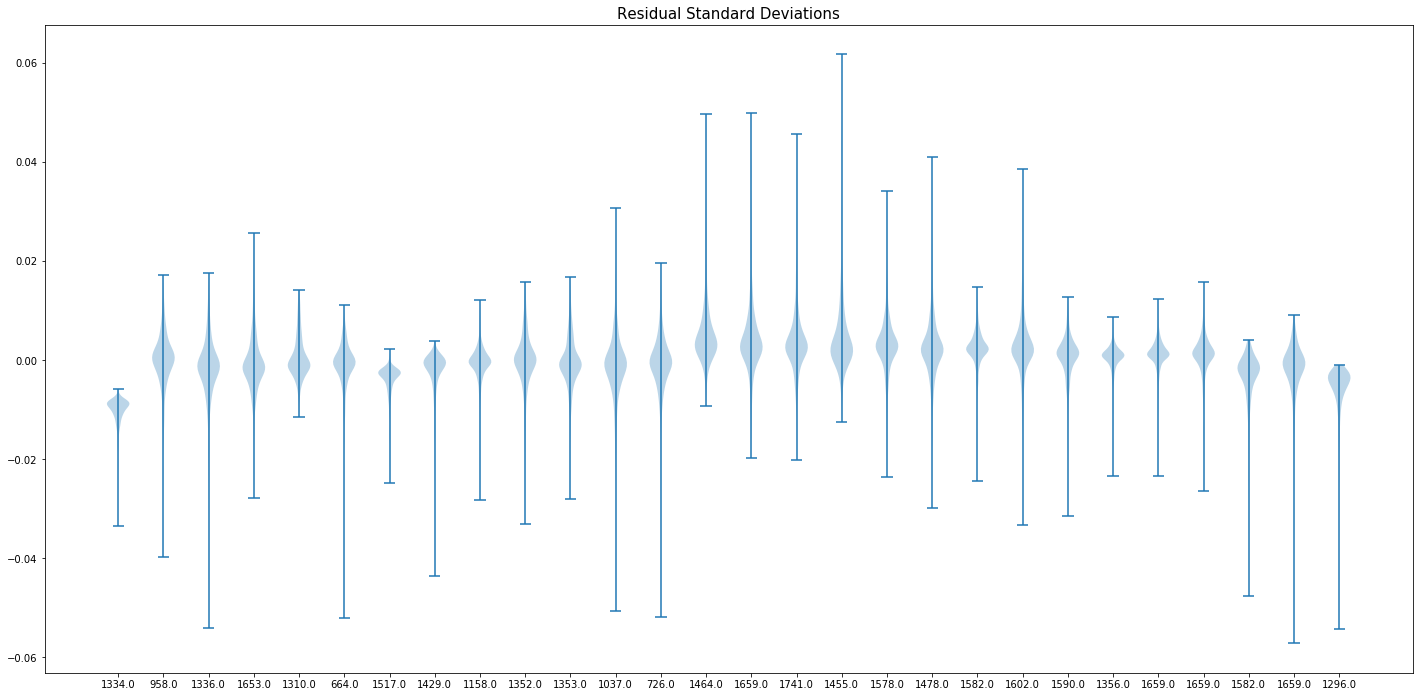

<Figure size 1368x648 with 0 Axes>

In [12]:
#one big violin plot 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 19
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

data_to_plot =[]
for each, val in enumerate(elements):
    dif = np.asarray(stdev_differences['difference'+ val])
    data_to_plot.append(dif)
    dif = []

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(data_to_plot)
    
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],position)
plt.title('Residual Standard Deviations', fontsize=15)

plt.show()
plt.savefig('allvio.png')

In [13]:
#below is an attempt to have everything in the right order

In [14]:
tc_sorted_tcmap = sorted(tc_map, key=tc_map.__getitem__)
elements_tc_sorted = list(sorted(tc_map, key=tc_map.__getitem__))
tc_sorted_table = table.copy()

In [15]:
atomicnum_tcsorted= []
tc_elements =[]
for kee, val in enumerate(elements_tc_sorted):
    for index, el in enumerate(elements):
        if val == el:
            atomicnum_tcsorted.append(atomic_number[index])
            tc_elements.append(val)

In [16]:
contempsort = []
for n in tc_elements:
    contempsort.append(tc_map[n])

In [17]:
beforetc_sorted = [] #standard deviations of the abundance data before condensation trends were removed
after_sorted = [] #standard deviations of residual abundances (after correct con temp trends removed)
for index, element in enumerate(tc_elements): 
    abundance_before_sorted = np.array(tc_sorted_table[element]) 
    beforetc_sorted.append(stdev(abundance_before_sorted)) 
    
    element_temp_sorted = [] #array for creation of after
    for ob in t['star_name']: #for each star in our data
        shinything = star_table(ob)
        shinything.sort('Condensation Temp')
    
        abund = np.array(shinything['Abundance']) 
        con_temp = np.array(shinything['Condensation Temp'])
        error = np.array(shinything['Abundance Error'])
        residu = residuals(con_temp, abund, error) #residuals with consendation temperatures removed
        element_temp_sorted.append(residu[index]) 
    after_sorted.append(np.std(element_temp_sorted)) 

In [18]:
beforetc_sorted = np.array(beforetc_sorted)
after_sorted = np.array(after_sorted)

difference_sorted = beforetc_sorted - after_sorted #change after regular con temp trends removed
increase = []
for num in difference_sorted:
    if num > 0:
        increase.append('decreased')
    elif num < 0:
        increase.append('increased')

In [19]:
con_temp_shuffle = []
for n in elements:
    con_temp_shuffle.append(tc_map[n]) 
   
stdevs = np.zeros((1000,28))
for i in tqdm(range(1000)):
    np.random.shuffle(con_temp_shuffle)
    all_residu = np.zeros((len(tc_sorted_table['star_name']),28))
    
    for j,ob in enumerate(t['star_name']):
        shinything2 = star_table(ob)
        shinything2.sort('Condensation Temp')
        
        abund = np.array(shinything2['Abundance']) 
        con_temp_shuff = np.array(con_temp_shuffle)
        error = np.array(shinything2['Abundance Error'])
        all_residu[j,:] = residuals(con_temp_shuff, abund, error)

    for index, element in tqdm(enumerate(tc_elements)):
        stdevs[i,index] = np.std(all_residu[:,index])

  0%|          | 0/1000 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|          | 1/1000 [00:00<11:34,  1.44it/s]
0it [00:00, ?it/s]
  0%|          | 2/1000 [00:01<11:33,  1.44it/s]
0it [00:00, ?it/s]
  0%|          | 3/1000 [00:02<11:32,  1.44it/s]
0it [00:00, ?it/s]
  0%|          | 4/1000 [00:02<11:38,  1.43it/s]
0it [00:00, ?it/s]
  0%|          | 5/1000 [00:03<11:27,  1.45it/s]
0it [00:00, ?it/s]
  1%|          | 6/1000 [00:04<11:19,  1.46it/s]
0it [00:00, ?it/s]
  1%|          | 7/1000 [00:04<11:20,  1.46it/s]
0it [00:00, ?it/s]
  1%|          | 8/1000 [00:05<11:17,  1.46it/s]
0it [00:00, ?it/s]
  1%|          | 9/1000 [00:06<11:15,  1.47it/s]
0it [00:00, ?it/s]
  1%|          | 10/1000 [00:06<11:15,  1.47it/s]
0it [00:00, ?it/s]
  1%|          | 11/1000 [00:07<11:22,  1.45it/s]
0it [00:00, ?it/s]
  1%|          | 12/1000 [00:08<11:18,  1.46it/s]
0it [00:00, ?it/s]
  1%|▏         | 13/1000 [00:08<11:19,  1.45it/s]
0it [00:00, ?it/s]
  1%|▏         | 14/1000 [00:09<11:20,  1.45it/s]
0i

0it [00:00, ?it/s]
 11%|█▏        | 114/1000 [01:17<09:52,  1.50it/s]
0it [00:00, ?it/s]
 12%|█▏        | 115/1000 [01:18<09:50,  1.50it/s]
0it [00:00, ?it/s]
 12%|█▏        | 116/1000 [01:19<10:45,  1.37it/s]
0it [00:00, ?it/s]
 12%|█▏        | 117/1000 [01:19<10:59,  1.34it/s]
0it [00:00, ?it/s]
 12%|█▏        | 118/1000 [01:20<11:09,  1.32it/s]
0it [00:00, ?it/s]
 12%|█▏        | 119/1000 [01:21<11:16,  1.30it/s]
0it [00:00, ?it/s]
 12%|█▏        | 120/1000 [01:22<10:47,  1.36it/s]
0it [00:00, ?it/s]
 12%|█▏        | 121/1000 [01:22<10:35,  1.38it/s]
0it [00:00, ?it/s]
 12%|█▏        | 122/1000 [01:23<10:23,  1.41it/s]
0it [00:00, ?it/s]
 12%|█▏        | 123/1000 [01:24<10:10,  1.44it/s]
0it [00:00, ?it/s]
 12%|█▏        | 124/1000 [01:24<10:00,  1.46it/s]
0it [00:00, ?it/s]
 12%|█▎        | 125/1000 [01:25<09:59,  1.46it/s]
0it [00:00, ?it/s]
 13%|█▎        | 126/1000 [01:26<09:49,  1.48it/s]
0it [00:00, ?it/s]
 13%|█▎        | 127/1000 [01:26<09:52,  1.47it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 23%|██▎       | 226/1000 [02:33<08:37,  1.50it/s]
0it [00:00, ?it/s]
 23%|██▎       | 227/1000 [02:34<08:33,  1.51it/s]
0it [00:00, ?it/s]
 23%|██▎       | 228/1000 [02:34<08:34,  1.50it/s]
0it [00:00, ?it/s]
 23%|██▎       | 229/1000 [02:35<08:38,  1.49it/s]
0it [00:00, ?it/s]
 23%|██▎       | 230/1000 [02:36<08:45,  1.46it/s]
0it [00:00, ?it/s]
 23%|██▎       | 231/1000 [02:36<08:46,  1.46it/s]
0it [00:00, ?it/s]
 23%|██▎       | 232/1000 [02:37<08:37,  1.48it/s]
0it [00:00, ?it/s]
 23%|██▎       | 233/1000 [02:38<08:32,  1.50it/s]
0it [00:00, ?it/s]
 23%|██▎       | 234/1000 [02:38<08:29,  1.50it/s]
0it [00:00, ?it/s]
 24%|██▎       | 235/1000 [02:39<08:29,  1.50it/s]
0it [00:00, ?it/s]
 24%|██▎       | 236/1000 [02:40<08:33,  1.49it/s]
0it [00:00, ?it/s]
 24%|██▎       | 237/1000 [02:40<08:35,  1.48it/s]
0it [00:00, ?it/s]
 24%|██▍       | 238/1000 [02:41<08:31,  1.49it/s]
0it [00:00, ?it/s]
 24%|██▍       | 239/1000 [02:42<08:27,  1.50it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 34%|███▍      | 338/1000 [03:49<07:23,  1.49it/s]
0it [00:00, ?it/s]
 34%|███▍      | 339/1000 [03:50<07:25,  1.48it/s]
0it [00:00, ?it/s]
 34%|███▍      | 340/1000 [03:51<07:20,  1.50it/s]
0it [00:00, ?it/s]
 34%|███▍      | 341/1000 [03:51<07:14,  1.52it/s]
0it [00:00, ?it/s]
 34%|███▍      | 342/1000 [03:52<07:14,  1.52it/s]
0it [00:00, ?it/s]
 34%|███▍      | 343/1000 [03:53<07:13,  1.51it/s]
0it [00:00, ?it/s]
 34%|███▍      | 344/1000 [03:53<07:08,  1.53it/s]
0it [00:00, ?it/s]
 34%|███▍      | 345/1000 [03:54<07:07,  1.53it/s]
0it [00:00, ?it/s]
 35%|███▍      | 346/1000 [03:55<07:05,  1.54it/s]
0it [00:00, ?it/s]
 35%|███▍      | 347/1000 [03:55<07:06,  1.53it/s]
0it [00:00, ?it/s]
 35%|███▍      | 348/1000 [03:56<07:18,  1.49it/s]
0it [00:00, ?it/s]
 35%|███▍      | 349/1000 [03:57<07:09,  1.51it/s]
0it [00:00, ?it/s]
 35%|███▌      | 350/1000 [03:57<07:08,  1.52it/s]
0it [00:00, ?it/s]
 35%|███▌      | 351/1000 [03:58<07:05,  1.53it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 45%|████▌     | 450/1000 [05:03<05:58,  1.53it/s]
0it [00:00, ?it/s]
 45%|████▌     | 451/1000 [05:04<06:01,  1.52it/s]
0it [00:00, ?it/s]
 45%|████▌     | 452/1000 [05:05<06:01,  1.51it/s]
0it [00:00, ?it/s]
 45%|████▌     | 453/1000 [05:05<06:02,  1.51it/s]
0it [00:00, ?it/s]
 45%|████▌     | 454/1000 [05:06<06:02,  1.51it/s]
0it [00:00, ?it/s]
 46%|████▌     | 455/1000 [05:07<06:01,  1.51it/s]
0it [00:00, ?it/s]
 46%|████▌     | 456/1000 [05:07<05:59,  1.51it/s]
0it [00:00, ?it/s]
 46%|████▌     | 457/1000 [05:08<05:57,  1.52it/s]
0it [00:00, ?it/s]
 46%|████▌     | 458/1000 [05:09<05:56,  1.52it/s]
0it [00:00, ?it/s]
 46%|████▌     | 459/1000 [05:09<05:57,  1.51it/s]
0it [00:00, ?it/s]
 46%|████▌     | 460/1000 [05:10<05:55,  1.52it/s]
0it [00:00, ?it/s]
 46%|████▌     | 461/1000 [05:11<05:56,  1.51it/s]
0it [00:00, ?it/s]
 46%|████▌     | 462/1000 [05:11<05:54,  1.52it/s]
0it [00:00, ?it/s]
 46%|████▋     | 463/1000 [05:12<05:54,  1.52it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 56%|█████▌    | 562/1000 [06:19<05:19,  1.37it/s]
0it [00:00, ?it/s]
 56%|█████▋    | 563/1000 [06:20<05:10,  1.41it/s]
0it [00:00, ?it/s]
 56%|█████▋    | 564/1000 [06:20<05:04,  1.43it/s]
0it [00:00, ?it/s]
 56%|█████▋    | 565/1000 [06:21<04:59,  1.45it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 566/1000 [06:22<04:55,  1.47it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 567/1000 [06:22<04:51,  1.49it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 568/1000 [06:23<04:49,  1.49it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 569/1000 [06:24<04:49,  1.49it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 570/1000 [06:25<04:52,  1.47it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 571/1000 [06:25<04:50,  1.48it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 572/1000 [06:26<04:49,  1.48it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 573/1000 [06:27<04:47,  1.48it/s]
0it [00:00, ?it/s]
 57%|█████▋    | 574/1000 [06:27<04:44,  1.50it/s]
0it [00:00, ?it/s]
 57%|█████▊    | 575/1000 [06:28<04:46,  1.48it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 67%|██████▋   | 674/1000 [07:35<03:42,  1.46it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 675/1000 [07:36<03:40,  1.47it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 676/1000 [07:36<03:36,  1.50it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 677/1000 [07:37<03:36,  1.49it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 678/1000 [07:38<03:35,  1.49it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 679/1000 [07:38<03:35,  1.49it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 680/1000 [07:39<03:35,  1.48it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 681/1000 [07:40<03:36,  1.47it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 682/1000 [07:40<03:35,  1.48it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 683/1000 [07:41<03:36,  1.47it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 684/1000 [07:42<03:33,  1.48it/s]
0it [00:00, ?it/s]
 68%|██████▊   | 685/1000 [07:42<03:34,  1.47it/s]
0it [00:00, ?it/s]
 69%|██████▊   | 686/1000 [07:43<03:32,  1.47it/s]
0it [00:00, ?it/s]
 69%|██████▊   | 687/1000 [07:44<03:33,  1.46it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 79%|███████▊  | 786/1000 [08:50<02:23,  1.49it/s]
0it [00:00, ?it/s]
 79%|███████▊  | 787/1000 [08:51<02:23,  1.49it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 788/1000 [08:52<02:22,  1.48it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 789/1000 [08:52<02:21,  1.49it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 790/1000 [08:53<02:19,  1.51it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 791/1000 [08:54<02:18,  1.50it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 792/1000 [08:54<02:18,  1.50it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 793/1000 [08:55<02:20,  1.47it/s]
0it [00:00, ?it/s]
 79%|███████▉  | 794/1000 [08:56<02:19,  1.48it/s]
0it [00:00, ?it/s]
 80%|███████▉  | 795/1000 [08:56<02:19,  1.47it/s]
0it [00:00, ?it/s]
 80%|███████▉  | 796/1000 [08:57<02:18,  1.48it/s]
0it [00:00, ?it/s]
 80%|███████▉  | 797/1000 [08:58<02:16,  1.49it/s]
0it [00:00, ?it/s]
 80%|███████▉  | 798/1000 [08:58<02:15,  1.49it/s]
0it [00:00, ?it/s]
 80%|███████▉  | 799/1000 [08:59<02:13,  1.51it/s]
0it [00:00, ?it/s]
 

0it [00:00, ?it/s]
 90%|████████▉ | 898/1000 [10:08<01:09,  1.48it/s]
0it [00:00, ?it/s]
 90%|████████▉ | 899/1000 [10:09<01:08,  1.48it/s]
0it [00:00, ?it/s]
 90%|█████████ | 900/1000 [10:09<01:07,  1.48it/s]
0it [00:00, ?it/s]
 90%|█████████ | 901/1000 [10:10<01:06,  1.49it/s]
0it [00:00, ?it/s]
 90%|█████████ | 902/1000 [10:11<01:05,  1.49it/s]
0it [00:00, ?it/s]
 90%|█████████ | 903/1000 [10:11<01:04,  1.49it/s]
0it [00:00, ?it/s]
 90%|█████████ | 904/1000 [10:12<01:05,  1.48it/s]
0it [00:00, ?it/s]
 90%|█████████ | 905/1000 [10:13<01:05,  1.45it/s]
0it [00:00, ?it/s]
 91%|█████████ | 906/1000 [10:14<01:05,  1.44it/s]
0it [00:00, ?it/s]
 91%|█████████ | 907/1000 [10:14<01:05,  1.42it/s]
0it [00:00, ?it/s]
 91%|█████████ | 908/1000 [10:15<01:05,  1.41it/s]
0it [00:00, ?it/s]
 91%|█████████ | 909/1000 [10:16<01:04,  1.42it/s]
0it [00:00, ?it/s]
 91%|█████████ | 910/1000 [10:16<01:03,  1.41it/s]
0it [00:00, ?it/s]
 91%|█████████ | 911/1000 [10:17<01:03,  1.41it/s]
0it [00:00, ?it/s]
 

In [20]:
stdev_differences_sorted = {} 
for ind, e in tqdm(enumerate(tc_elements)): 
    stdev_differences_sorted['difference' + e] = []
    for index, each in enumerate(stdevs[:,ind]):
        diff_sort = beforetc_sorted[ind] - (stdevs[index, ind])
        stdev_differences_sorted['difference'+ e].append(diff_sort)
        
names_sort = {}
atomic_sort = {}
stdev_true_sort = {}
for k, v in enumerate(tc_elements):
    names_sort[v] = [v] * 1000
    atomic_sort[v] = [atomicnum_tcsorted[k]] * 1000
    stdev_true_sort[v] = [beforetc_sorted[k]] * 1000

28it [00:00, 728.54it/s]


In [21]:
diffsorted = []
for key, value in enumerate(tc_elements):
    diffsorted.append(after_sorted[key]-beforetc_sorted[key])

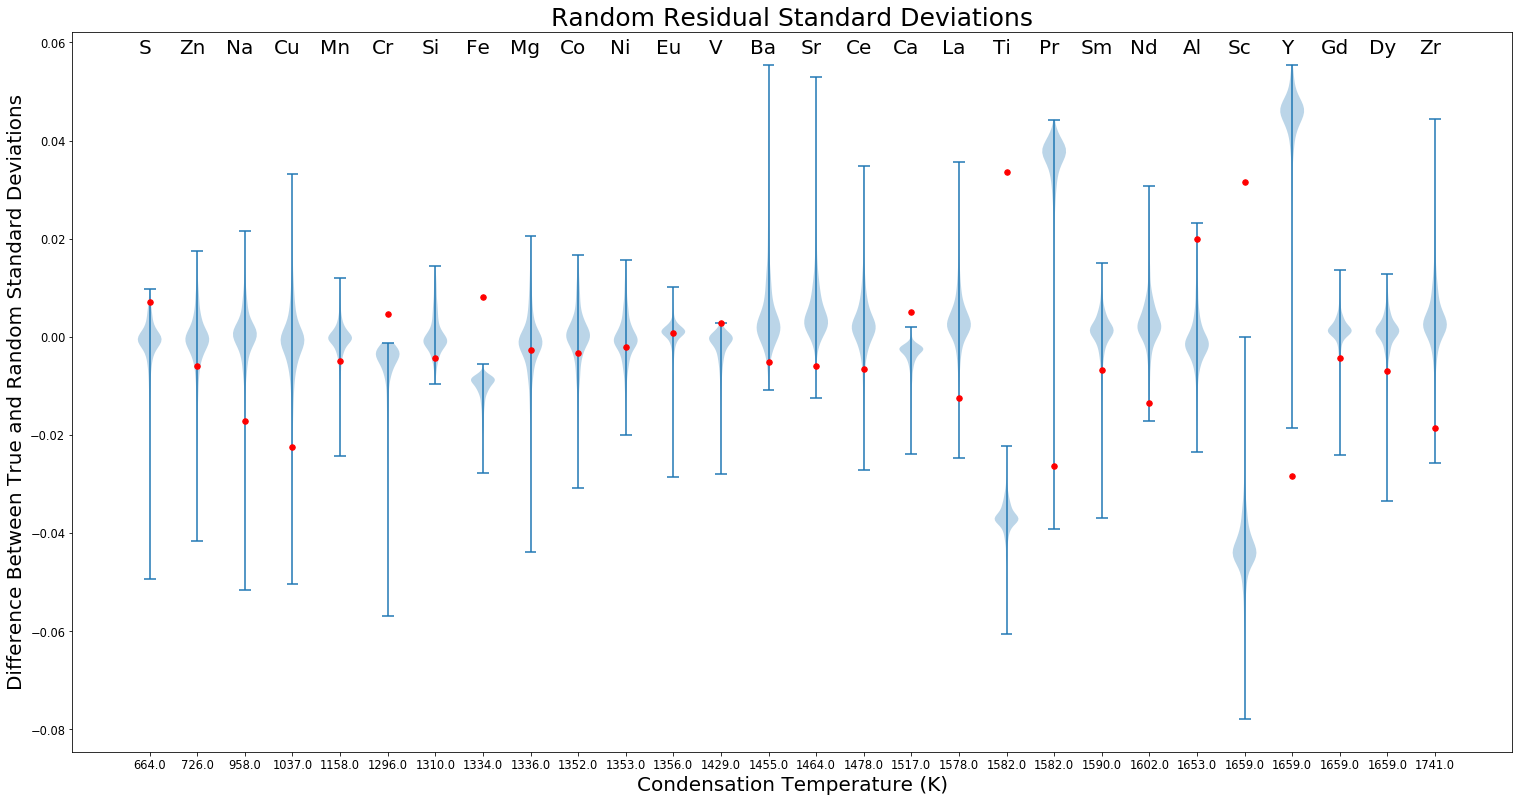

<Figure size 1440x720 with 0 Axes>

In [22]:
position_sort = np.array(contempsort)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

data_to_plot_sort =[]
for each, val in enumerate(tc_elements):
    dif_sort = np.asarray(stdev_differences_sorted['difference'+ val])
    data_to_plot_sort.append(dif_sort)
    dif_sort = []

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bps = ax.violinplot(data_to_plot_sort)
    
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],position_sort, fontsize = 11.5)
plt.yticks(fontsize=11.5)
plt.title('Random Residual Standard Deviations', fontsize=25)
inds = np.arange(1, len(diffsorted) + 1)
plt.scatter(inds, diffsorted, marker='o', color='r', s=30, zorder=27)

plt.xlabel('Condensation Temperature (K)', fontsize = 20)
plt.ylabel('Difference Between True and Random Standard Deviations', fontsize = 20)


for i, txt in enumerate(tc_elements): 
    plt.annotate(txt, xy=(inds[i], .056), xytext = (-5,5), fontsize=20, 
                 textcoords='offset points', ha='center', va='bottom')

plt.show()
plt.savefig('allvio.png')

In [23]:
#atomic number - sorted graph

atomic_number = [26, 11, 12, 13, 14, 16, 20, 23, 25, 27, 28, 29, 30, 38, 39, 40, 56, 57, 58, 59, 60, 62, 63, 64, 66, 22, 21, 24]

atomicnum = sorted(atomic_number)
atomicnum = np.array(atomicnum)


elements_amorder = []
for each, value in atomicnum: 
    for every, num in atomic_number:
        if atomicnum[each] == atomic_number[every]:
            elements_amorder.append(elements[each])

TypeError: cannot unpack non-iterable numpy.int64 object

In [ ]:
atomic_num = {}
for i, e in enumerate(elements):
    atomic_num[e] = atomic_number[i]

correct_order = []
atomic_num_order = sorted(atomic_num, key=atomic_num.__getitem__)
am_ordered_table = table.copy()

for each, value in enumerate(atomic_number):
    for every, num in enumerate(atomic_num_order):
        if atomic_number[each] == atomic_num[every]:
            correct_order.append(atomic_number[each])
            
            


In [ ]:
atomic_num_order

In [ ]:
beforetc_amorder = [] #standard deviations of the abundance data before condensation trends were removed
after_amorder = [] #standard deviations of residual abundances (after correct con temp trends removed)
for index, element in enumerate(atomic_num_order): 
    abundance_before_amorder = np.array(am_ordered_table[element]) 
    beforetc_amorder.append(stdev(abundance_before_amorder)) 
    
    element_temp_order = [] #array for creation of after
    for ob in t['star_name']: #for each star in our data
        shinything3 = star_table(ob)
        shinything3.sort('Atomic Number')
    
        abund = np.array(shinything3['Abundance']) 
        con_temp = np.array(shinything3['Condensation Temp'])
        error = np.array(shinything3['Abundance Error'])
        residu = residuals(con_temp, abund, error) #residuals with consendation temperatures removed
        element_temp_order.append(residu[index]) 
    after_amorder.append(np.std(element_temp_order)) 

In [ ]:
beforetc_amorder = np.array(beforetc_amorder)
after_amorder = np.array(after_amorder)

difference_amorder = beforetc_amorder - after_amorder #change after regular con temp trends removed
increase = []
for num in difference_amorder:
    if num > 0:
        increase.append('decreased')
    elif num < 0:
        increase.append('increased')

In [ ]:
con_temp_shuffle = []
for n in elements:
    con_temp_shuffle.append(tc_map[n]) 
   
stdevs = np.zeros((1000,28))
for i in tqdm(range(1000)):
    np.random.shuffle(con_temp_shuffle)
    all_residu = np.zeros((len(am_ordered_table['star_name']),28))
    
    for j,ob in enumerate(t['star_name']):
        shinything4 = star_table(ob)
        shinything4.sort('Atomic Number')
        
        abund = np.array(shinything4['Abundance']) 
        con_temp_shuff = np.array(con_temp_shuffle)
        error = np.array(shinything4['Abundance Error'])
        all_residu[j,:] = residuals(con_temp_shuff, abund, error)

    for index, element in tqdm(enumerate(atomic_num_order)):
        stdevs[i,index] = np.std(all_residu[:,index])

In [ ]:
stdev_differences_ordered = {} 
for ind, e in tqdm(enumerate(atomic_num_order)): 
    stdev_differences_ordered['difference' + e] = []
    for index, each in enumerate(stdevs[:,ind]):
        diff_order = beforetc_amorder[ind] - (stdevs[index, ind])
        stdev_differences_ordered['difference'+ e].append(diff_order)
        
names_ord = {}
atomic_ord = {}
stdev_true_ord = {}
for k, v in enumerate(atomic_num_order):
    names_ord[v] = [v] * 1000
    atomic_ord[v] = [atomic_num_order[k]] * 1000
    stdev_true_ord[v] = [beforetc_amorder[k]] * 1000

In [ ]:
difforder= []
for key, value in enumerate(atomic_num_order):
    difforder.append(after_amorder[key]-beforetc_amorder[key])

In [ ]:
position_ord = np.array(atomic_num)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

data_to_plot_ord =[]
for each, val in enumerate(atomic_num_order):
    dif_ord = np.asarray(stdev_differences_ordered['difference'+ val])
    data_to_plot_ord.append(dif_ord)
    dif_ord = []

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bps = ax.violinplot(data_to_plot_ord)
    
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], atomic_number, fontsize = 11.5)
plt.yticks(fontsize=11.5)
plt.title('Random Residual Standard Deviations', fontsize=25)
inds = np.arange(1, len(difforder) + 1)
plt.scatter(inds, difforder, marker='o', color='r', s=30, zorder=27)

plt.xlabel('Atomic Number', fontsize = 20)
plt.ylabel('Difference Between True and Random Standard Deviations', fontsize = 20)


for i, txt in enumerate(atomic_num_order): 
    plt.annotate(txt, xy=(inds[i], .056), xytext = (-5,5), fontsize=20, 
                 textcoords='offset points', ha='center', va='bottom')

plt.show()
plt.savefig('allvio.png')